# Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

# Import Data

In [131]:
covid = pd.read_csv('owid-covid-data.csv')
countries = pd.read_csv('countries-of-the-world.csv')

In [132]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [133]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


# Cleaning The Data

Lets start by checking the location cloumn to make sure it only includes countries.

In [134]:
covid.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

Some of the locations are not countries, it includes continents and other regions.

We can use the countries data set to filter out the unwanted rows in the location column of the covid data set.

In [135]:
# We only need the country column from the dataset
countries = pd.DataFrame(countries, columns=['Country', 'Population'])

# Casting it to type string and setting it to UpperCase
countries['Country'] = countries['Country'].astype(str).str[0:-1]

# Cleaning Dataset with " " (whitespace) at the back
countries['Country'] = countries['Country'].str.upper()

# Casting it to type string and setting it to UpperCase
covid['location'] = covid['location'].astype(str).str.upper()

Now we just need to join the to data frames together.

In [136]:
# Combine both dataframes based on covid data frame on right join to get countries only in the covid database
# The column in the covid dataset contains sub-continents and continents, therefore joining with a country dataset cleans up what is not necessary
covid2 = pd.merge(countries, covid, how='right',left_on='Country', right_on='location')
covid2

,Country,Population,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-24,5.0,5.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-25,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-26,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-27,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-28,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZIMBABWE,12236805.0,ZWE,Africa,ZIMBABWE,2022-03-01,236871.0,491.0,413.000,5395.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZIMBABWE,12236805.0,ZWE,Africa,ZIMBABWE,2022-03-02,237503.0,632.0,416.286,5396.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZIMBABWE,12236805.0,ZWE,Africa,ZIMBABWE,2022-03-03,237503.0,0.0,362.286,5396.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZIMBABWE,12236805.0,ZWE,Africa,ZIMBABWE,2022-03-04,238739.0,1236.0,467.429,5397.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Lets check if it worked

In [137]:
covid2.location.unique()

array(['AFGHANISTAN', 'AFRICA', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',
       'ANGUILLA', 'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'ARUBA',
       'ASIA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN',
       'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN',
       'BERMUDA', 'BHUTAN', 'BOLIVIA', 'BONAIRE SINT EUSTATIUS AND SABA',
       'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 'BRAZIL',
       'BRITISH VIRGIN ISLANDS', 'BRUNEI', 'BULGARIA', 'BURKINA FASO',
       'BURUNDI', 'CAMBODIA', 'CAMEROON', 'CANADA', 'CAPE VERDE',
       'CAYMAN ISLANDS', 'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHILE',
       'CHINA', 'COLOMBIA', 'COMOROS', 'CONGO', 'COOK ISLANDS',
       'COSTA RICA', "COTE D'IVOIRE", 'CROATIA', 'CUBA', 'CURACAO',
       'CYPRUS', 'CZECHIA', 'DEMOCRATIC REPUBLIC OF CONGO', 'DENMARK',
       'DJIBOUTI', 'DOMINICA', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT',
       'EL SALVADOR', 'EQUATORIAL GUINEA', 'ERITREA', 'ESTONIA',
       'ESWATINI', 'ETHI

### Re-Index the dataframe

Add an index column that starts at 1 instead of 0.

In [138]:
covid2.index = [x for x in range(1, len(covid2.values)+1)]
covid2

,Country,Population,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-24,5.0,5.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-25,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-26,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-27,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-28,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166322,ZIMBABWE,12236805.0,ZWE,Africa,ZIMBABWE,2022-03-01,236871.0,491.0,413.000,5395.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZIMBABWE,12236805.0,ZWE,Africa,ZIMBABWE,2022-03-02,237503.0,632.0,416.286,5396.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZIMBABWE,12236805.0,ZWE,Africa,ZIMBABWE,2022-03-03,237503.0,0.0,362.286,5396.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166325,ZIMBABWE,12236805.0,ZWE,Africa,ZIMBABWE,2022-03-04,238739.0,1236.0,467.429,5397.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Next we can set a name for the index field through simple assignment:

In [139]:
# add index field name
covid2.index.name = 'id'
covid2

,Country,Population,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
id,,,,,,,,,,,,,,,,,,,,,
1,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-24,5.0,5.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-25,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-26,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-27,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFGHANISTAN,31056997.0,AFG,Asia,AFGHANISTAN,2020-02-28,5.0,0.0,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166322,ZIMBABWE,12236805.0,ZWE,Africa,ZIMBABWE,2022-03-01,236871.0,491.0,413.000,5395.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZIMBABWE,12236805.0,ZWE,Africa,ZIMBABWE,2022-03-02,237503.0,632.0,416.286,5396.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZIMBABWE,12236805.0,ZWE,Africa,ZIMBABWE,2022-03-03,237503.0,0.0,362.286,5396.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


# Data Analysis

### Death Rate Per Country

Lets make a new data frame with one row per country and calculate a column for the death rate of each.

In [140]:
# This is getting the final total up to recent date for cases and deaths for each country
death = pd.DataFrame(covid2.groupby(['Country','continent'])["total_deaths"].max()).reset_index(drop=False)
cases = pd.DataFrame(covid2.groupby(['Country'])["total_cases"].max()).reset_index(drop=False)
vaccinations = pd.DataFrame(covid2.groupby(['Country'])['total_vaccinations'].max()).reset_index(drop=False)

#Combining both dataframes and calculating the rate of death per country
death_rate = pd.merge(death, cases, how='inner',left_on='Country', right_on='Country')
death_rate = pd.merge(death_rate, vaccinations, how='inner', left_on='Country', right_on='Country')
death_rate["death_rate"] = round((death_rate["total_deaths"]/death_rate["total_cases"])*100,2)
#death_rate['vax_rate'] = round((death_rate['total_vaccinations']/death_rate['Population'])*100,2)
death_rate.sort_values(by=['death_rate'], ascending=False)


,Country,continent,total_deaths,total_cases,total_vaccinations,death_rate
187,YEMEN,Asia,2135.0,11775.0,772574.0,18.13
161,SUDAN,Africa,3912.0,61569.0,5711034.0,6.35
135,PERU,South America,210907.0,3522484.0,61868467.0,5.99
112,MEXICO,North America,319604.0,5554392.0,183043385.0,5.75
165,SYRIA,Asia,3092.0,54963.0,3187594.0,5.63
...,...,...,...,...,...,...
143,SAINT HELENA,Africa,NaN,4.0,7892.0,NaN
146,SAMOA,Oceania,NaN,33.0,276278.0,NaN
171,TONGA,Oceania,NaN,898.0,147193.0,NaN
174,TURKMENISTAN,Asia,NaN,NaN,7580976.0,NaN


### Lets look at the number of cases per continent

In [141]:
#Getting the dataframe for continent only
continent = pd.DataFrame(covid2.groupby(['continent'])["total_cases"].max())
continent = continent.reset_index(drop=False)
continent = continent.sort_values(by=['continent'])
continent

,continent,total_cases
0,Africa,3683172.0
1,Asia,42962953.0
2,Europe,23064766.0
3,North America,79265726.0
4,Oceania,3362035.0
5,South America,29040800.0


### Combine the country and continent datasets

This is to get the rate of cases by country comparatively to a continent

In [142]:
# Looking at the percentage of each countries contribution to the total case per continent
# First change the column names
death_rate.rename(columns={"total_cases": "country_case"}, inplace = True)
continent.rename(columns={"total_cases": "continent_case"}, inplace = True)

# Now we can merge the dataframes together
case_rate = pd.merge(death_rate, continent, how='left',left_on='continent', right_on='continent')

# Add a column to calculate the country's number of cases compared to the number of cases on the continent
case_rate["case_per_continent"] = round((case_rate["country_case"]/case_rate["continent_case"])*100,2)
case_rate = case_rate.dropna(subset=['death_rate'])
case_rate = case_rate.sort_values(by=['death_rate'], ascending=False)
case_rate

,Country,continent,total_deaths,country_case,total_vaccinations,death_rate,continent_case,case_per_continent
187,YEMEN,Asia,2135.0,11775.0,772574.0,18.13,42962953.0,0.03
161,SUDAN,Africa,3912.0,61569.0,5711034.0,6.35,3683172.0,1.67
135,PERU,South America,210907.0,3522484.0,61868467.0,5.99,29040800.0,12.13
112,MEXICO,North America,319604.0,5554392.0,183043385.0,5.75,79265726.0,7.01
165,SYRIA,Asia,3092.0,54963.0,3187594.0,5.63,42962953.0,0.13
...,...,...,...,...,...,...,...,...
27,BURUNDI,Africa,38.0,38150.0,11101.0,0.10,3683172.0,1.04
32,CAYMAN ISLANDS,North America,17.0,19373.0,143257.0,0.09,79265726.0,0.02
20,BHUTAN,Asia,7.0,14451.0,1584463.0,0.05,42962953.0,0.03
76,ICELAND,Europe,68.0,140929.0,803609.0,0.05,23064766.0,0.61


### Plot the number of cases vs. the number of deaths in each country

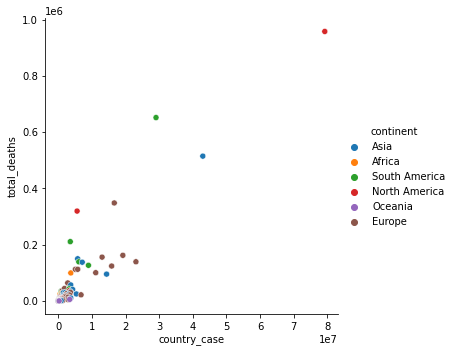

In [143]:
sns.relplot(data=case_rate, x="country_case", y="total_deaths", hue="continent")

This plot shows 3 outliners: The United States, Brazil, and India. These three countries had a higher total case count and death count campared to the rest of the world.

In [144]:
case_rate.sort_values(by=['total_deaths'], ascending=False)

,Country,continent,total_deaths,country_case,total_vaccinations,death_rate,continent_case,case_per_continent
180,UNITED STATES,North America,958437.0,79265726.0,5.548682e+08,1.21,79265726.0,100.00
23,BRAZIL,South America,652216.0,29040800.0,3.954648e+08,2.25,29040800.0,100.00
77,INDIA,Asia,515036.0,42962953.0,1.786849e+09,1.20,42962953.0,100.00
141,RUSSIA,Europe,348467.0,16619507.0,1.611959e+08,2.10,23064766.0,72.06
112,MEXICO,North America,319604.0,5554392.0,1.830434e+08,5.75,79265726.0,7.01
...,...,...,...,...,...,...,...,...
186,WALLIS AND FUTUNA,Oceania,7.0,454.0,1.284900e+04,1.54,3362035.0,0.01
20,BHUTAN,Asia,7.0,14451.0,1.584463e+06,0.05,42962953.0,0.03
131,PALAU,Oceania,6.0,3844.0,NaN,0.16,3362035.0,0.11
116,MONTSERRAT,North America,2.0,164.0,4.089000e+03,1.22,79265726.0,0.00


### Plot the death rate vs the number of cases for each country

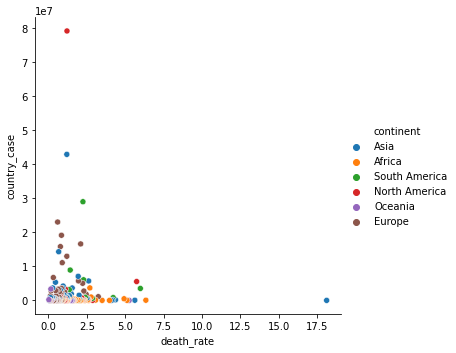

In [148]:
sns.relplot(data=case_rate, x="death_rate", y="country_case", hue="continent")

This graph shows that there are two outliner countries. These outliners are the Montserrat; which had a low death rate compared to it's high case count, and Yeman, which had a high death rate compared to it's low case count.

In [146]:
continent.sort_values('continent_case', ascending=False).reset_index(drop=True)

,continent,continent_case
0,North America,79265726.0
1,Asia,42962953.0
2,South America,29040800.0
3,Europe,23064766.0
4,Africa,3683172.0
5,Oceania,3362035.0


This table shows that North America had the highest case count.

### Select variables of Interest

In [4]:
covid1 = covid[['iso_code', 'continent','location', 'date', 'population', 'population_density', 'total_cases', 'total_cases_per_million',
                'new_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'new_deaths_per_million', 
                'total_vaccinations', 'total_vaccinations_per_hundred', 'people_fully_vaccinated', 
                'people_fully_vaccinated_per_hundred', 'total_boosters', 'total_boosters_per_hundred']]
covid1.head(-10)

,iso_code,continent,location,date,population,population_density,total_cases,total_cases_per_million,new_cases_per_million,total_deaths,total_deaths_per_million,new_deaths_per_million,total_vaccinations,total_vaccinations_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_boosters,total_boosters_per_hundred
0,AFG,Asia,Afghanistan,2020-02-24,39835428.0,54.422,5.0,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,39835428.0,54.422,5.0,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,39835428.0,54.422,5.0,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,39835428.0,54.422,5.0,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,39835428.0,54.422,5.0,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166311,ZWE,Africa,Zimbabwe,2022-02-19,15092171.0,42.729,233224.0,15453.310,12.854,5386.0,356.874,0.066,7820885.0,51.82,3371563.0,22.34,110403.0,0.73
166312,ZWE,Africa,Zimbabwe,2022-02-20,15092171.0,42.729,233352.0,15461.791,8.481,5386.0,356.874,0.000,7823894.0,51.84,3372616.0,22.35,110866.0,0.73
166313,ZWE,Africa,Zimbabwe,2022-02-21,15092171.0,42.729,233571.0,15476.302,14.511,5386.0,356.874,0.000,7829096.0,51.88,3374371.0,22.36,112604.0,0.75
166314,ZWE,Africa,Zimbabwe,2022-02-22,15092171.0,42.729,233980.0,15503.402,27.100,5388.0,357.006,0.133,7836325.0,51.92,3376712.0,22.37,114691.0,0.76


Lets make a dataframe of just the United States.

### Create a dataframe for cases in the United States

In [8]:
covid_USA = covid1[covid1.location == "United States"]
covid_USA

,iso_code,continent,location,date,population,population_density,total_cases,total_cases_per_million,new_cases_per_million,total_deaths,total_deaths_per_million,new_deaths_per_million,total_vaccinations,total_vaccinations_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_boosters,total_boosters_per_hundred
157222,USA,North America,United States,2020-01-22,332915074.0,35.608,1.0,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157223,USA,North America,United States,2020-01-23,332915074.0,35.608,1.0,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157224,USA,North America,United States,2020-01-24,332915074.0,35.608,2.0,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157225,USA,North America,United States,2020-01-25,332915074.0,35.608,2.0,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157226,USA,North America,United States,2020-01-26,332915074.0,35.608,5.0,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157991,USA,North America,United States,2022-03-01,332915074.0,35.608,79091361.0,237572.183,141.270,952423.0,2860.859,5.079,554475530.0,167.01,215166280.0,64.81,94753028.0,28.54
157992,USA,North America,United States,2022-03-02,332915074.0,35.608,79143716.0,237729.446,157.262,954518.0,2867.152,6.293,554692730.0,167.07,215226511.0,64.83,94847407.0,28.57
157993,USA,North America,United States,2022-03-03,332915074.0,35.608,79196008.0,237886.519,157.073,956261.0,2872.387,5.236,554842009.0,167.12,215266826.0,64.84,94914378.0,28.59
157994,USA,North America,United States,2022-03-04,332915074.0,35.608,79250509.0,238050.227,163.708,958144.0,2878.043,5.656,554868239.0,167.12,215274110.0,64.84,94925621.0,28.59


Next we will reformat the dates column to datetime objects.

In [9]:
# Create datetime column for plotting through time.
#covid1['datetime_date'] = pd.to_datetime(covid1['date'], format='%Y-%m-%d')
covid1.date = pd.to_datetime(covid1['date'])
covid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   iso_code                             166326 non-null  object        
 1   continent                            156370 non-null  object        
 2   location                             166326 non-null  object        
 3   date                                 166326 non-null  datetime64[ns]
 4   population                           165251 non-null  float64       
 5   population_density                   147928 non-null  float64       
 6   total_cases                          163293 non-null  float64       
 7   total_cases_per_million              162535 non-null  float64       
 8   new_cases_per_million                162375 non-null  float64       
 9   total_deaths                         145451 non-null  float64       
 

/var/folders/24/536gs7r91qzd964t2ppqhs6m0000gn/T/ipykernel_5058/3414705829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid1.date = pd.to_datetime(covid1['date'])


How many N/A fields are there?

In [11]:
covid1.isna().sum()

iso_code                                    0
continent                                9956
location                                    0
date                                        0
population                               1075
population_density                      18398
total_cases                              3033
total_cases_per_million                  3791
new_cases_per_million                    3951
total_deaths                            20875
total_deaths_per_million                21620
new_deaths_per_million                  21584
total_vaccinations                     121132
total_vaccinations_per_hundred         121132
people_fully_vaccinated                126085
people_fully_vaccinated_per_hundred    126085
total_boosters                         148787
total_boosters_per_hundred             148787
datetime_date                               0
dtype: int64

## Create a dataframe of countries of interest.

In [12]:
# Create list of interesting locations 
countries = ["USA", "AUS", "CHN", "GBR", "ESP", "IND"]
temp_data = covid1[covid1['iso_code'].isin(countries)]

# Visualize The Data

## Plot Total Cases Per Million

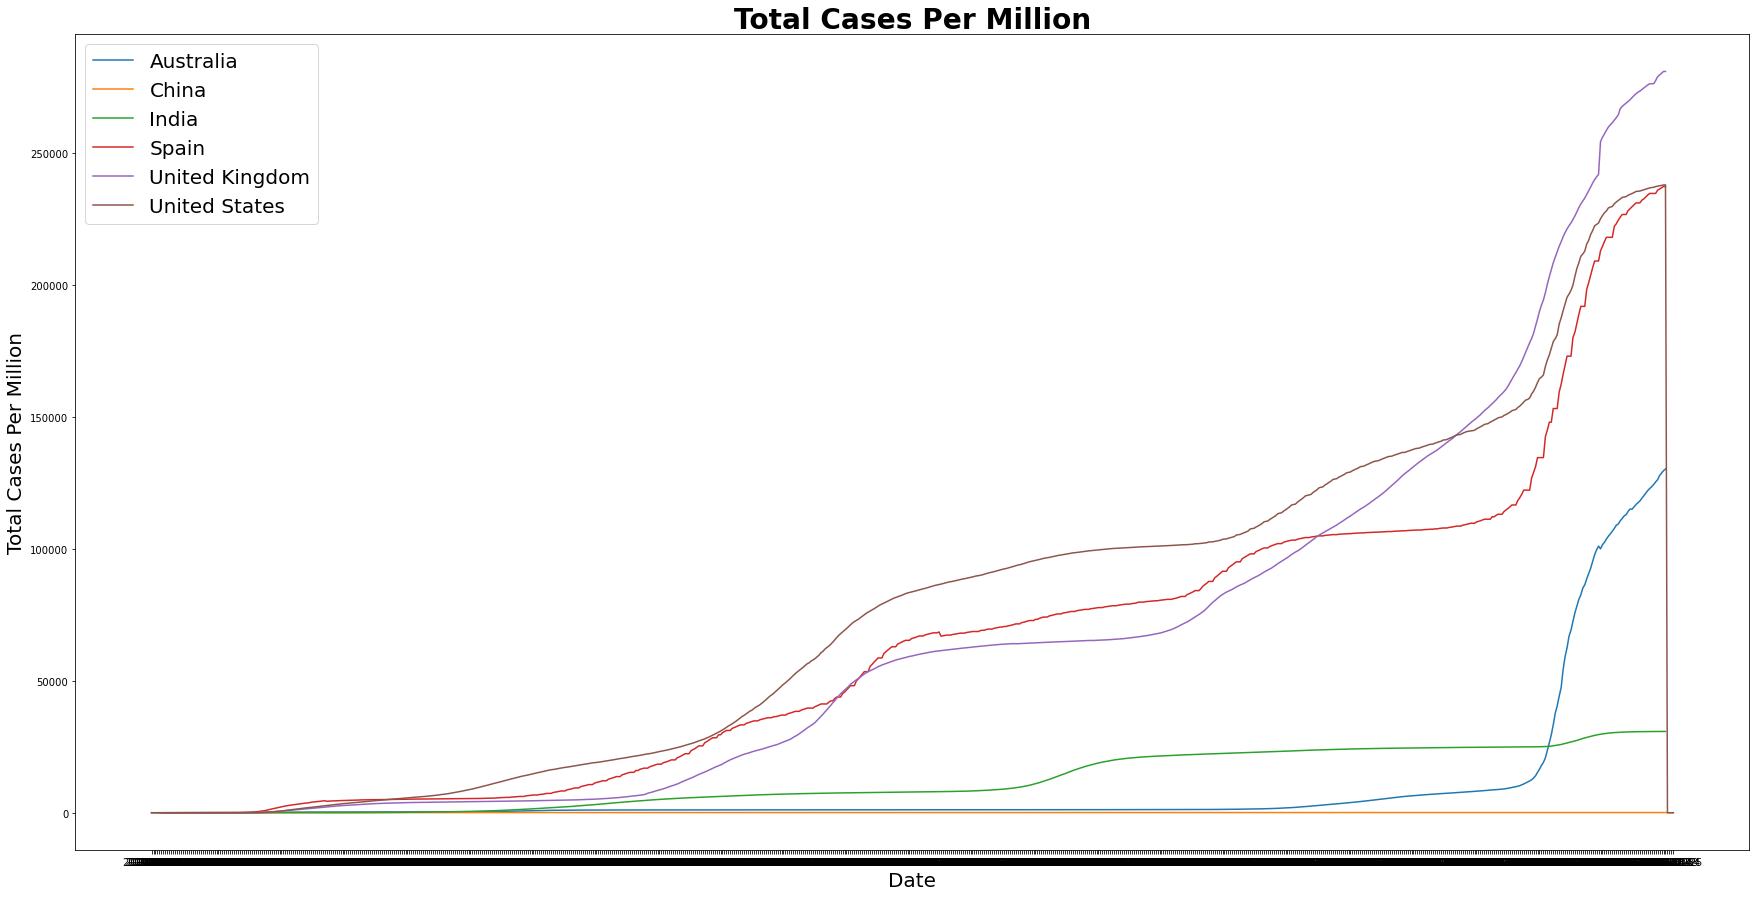

In [46]:
fig, ax = plt.subplots(figsize = (30,15))
ax = sns.lineplot(data=temp_data, x="date", y="total_cases_per_million", hue="location")
# Axis and formatting
ax.set_title("Total Cases Per Million", fontsize = 28, fontweight = 'bold')
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Total Cases Per Million", fontsize = 20)

ax.legend(loc="best", fontsize=20)

## Plot Total Deaths Per Milliion

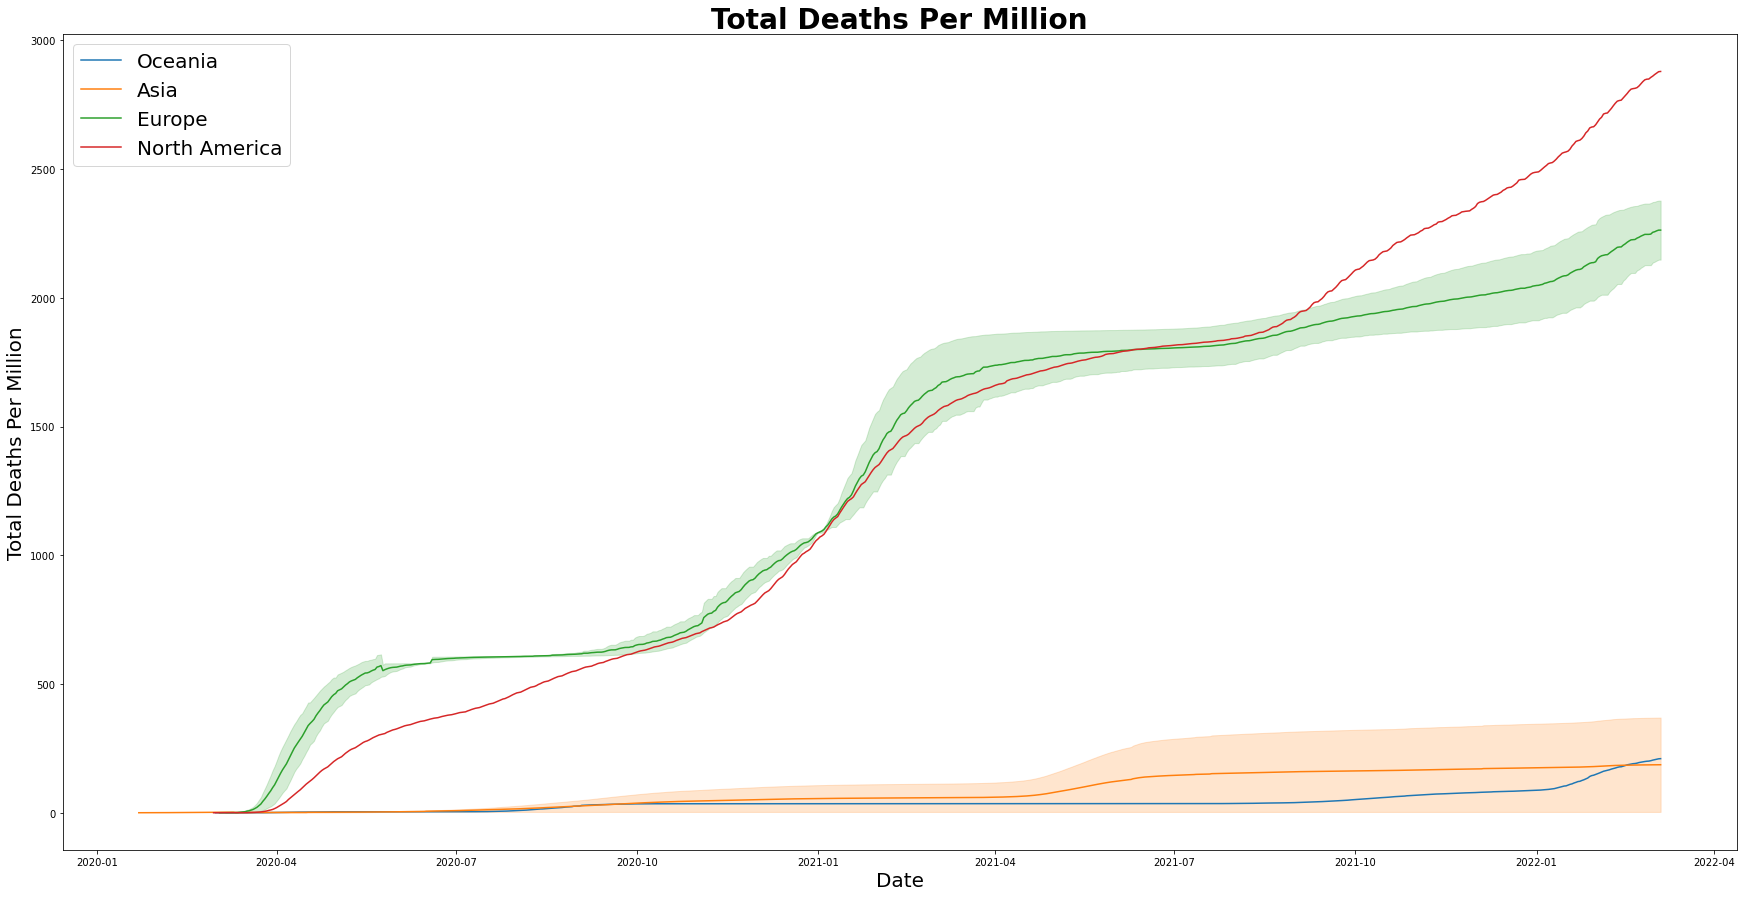

In [49]:
fig, ax = plt.subplots(figsize = (30,15))
ax = sns.lineplot(data=temp_data, x="date", y="total_deaths_per_million", hue="continent")
# Axis and formatting
ax.set_title("Total Deaths Per Million", fontsize = 28, fontweight = 'bold')
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Total Deaths Per Million", fontsize = 20)

ax.legend(loc="best", fontsize=20)



## Plot Total Vaccinations Per Hundred

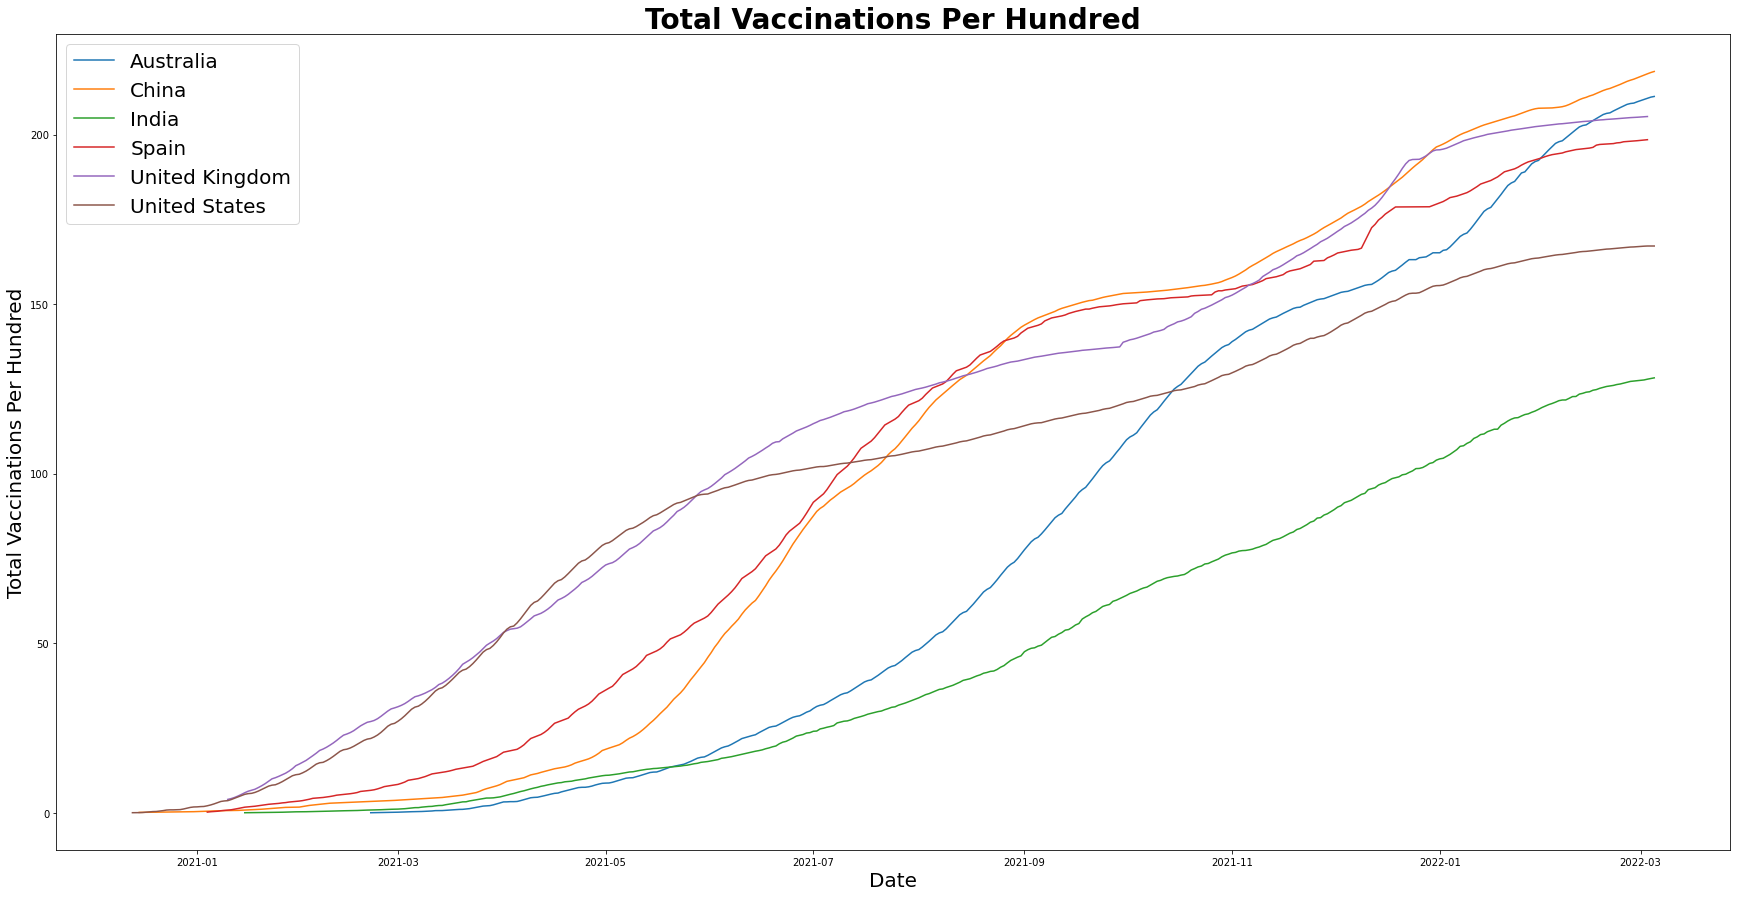

In [16]:
fig, ax = plt.subplots(figsize = (30,15))
ax = sns.lineplot(data=temp_data, x="date", y="total_vaccinations_per_hundred", hue="location")
# Axis and formatting
ax.set_title("Total Vaccinations Per Hundred", fontsize = 28, fontweight = 'bold')
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Total Vaccinations Per Hundred", fontsize = 20)

ax.legend(loc="best", fontsize=20)


## Plot New Cases In The United States Over Time

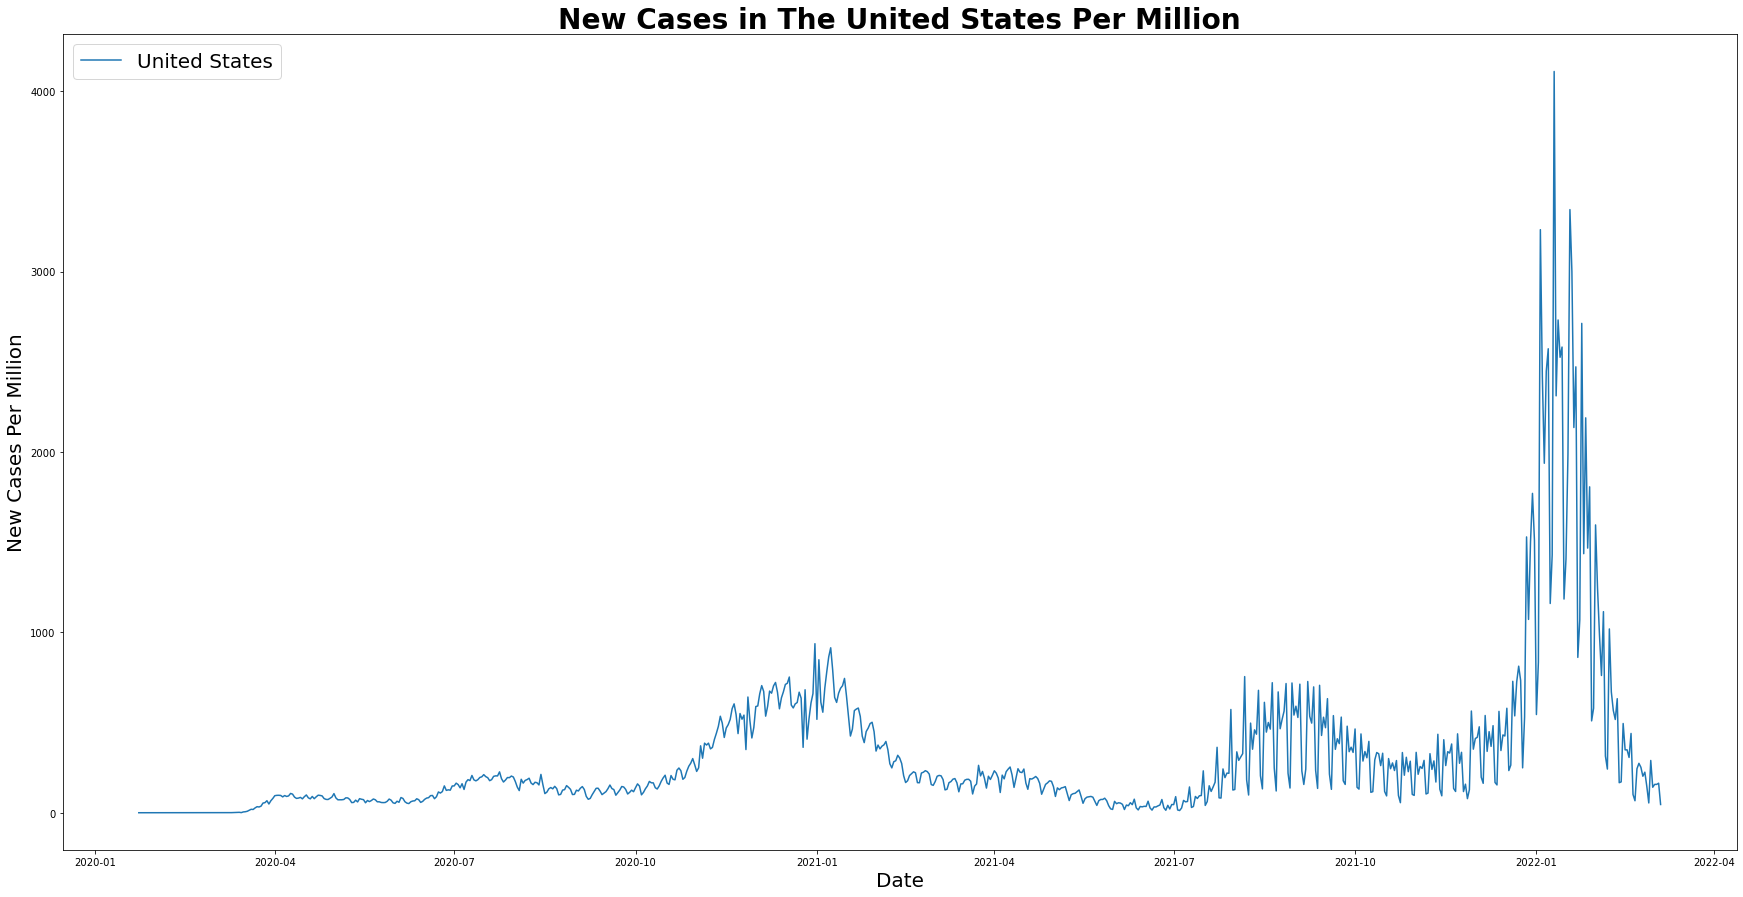

In [20]:
fig, ax = plt.subplots(figsize = (30,15))
ax = sns.lineplot(data=covid1[covid1['iso_code'] == 'USA'], x="date", y="new_cases_per_million", hue="location")
# Axis and formatting
ax.set_title("New Cases in The United States Per Million", fontsize = 28, fontweight = 'bold')
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("New Cases Per Million", fontsize = 20)

ax.legend(loc="best", fontsize=20)


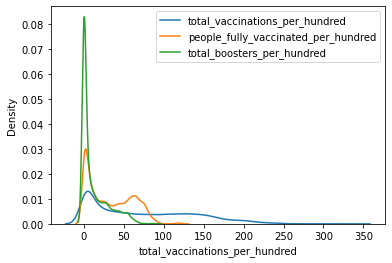

In [13]:
sns.kdeplot(covid1['total_vaccinations_per_hundred'], label='total_vaccinations_per_hundred' )
sns.kdeplot(covid1['people_fully_vaccinated_per_hundred'], label='people_fully_vaccinated_per_hundred' )
sns.kdeplot(covid1['total_boosters_per_hundred'], label='total_boosters_per_hundred' )

plt.legend()

### Calculate the total number of deaths in each country

In [9]:
covid_total = covid1.groupby('location').max('total_deaths')
covid_total

,population,population_density,total_cases,total_cases_per_million,new_cases_per_million,total_deaths,total_deaths_per_million,new_deaths_per_million,total_vaccinations,total_vaccinations_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_boosters,total_boosters_per_hundred
location,,,,,,,,,,,,,,
Afghanistan,3.983543e+07,54.422,174331.0,4376.280,81.410,7622.0,191.337,3.991,5.535254e+06,13.90,4.231984e+06,10.62,NaN,NaN
Africa,1.373486e+09,NaN,11268386.0,8204.221,44.065,249206.0,181.440,1.102,4.094364e+08,29.81,1.681794e+08,12.24,1.302369e+07,0.95
Albania,2.872934e+06,104.871,272030.0,94687.173,1666.937,3478.0,1210.609,7.310,2.708574e+06,94.28,1.198759e+06,41.73,2.390700e+05,8.32
Algeria,4.461663e+07,17.348,265227.0,5944.578,56.504,6853.0,153.597,1.098,1.363168e+07,30.55,6.076272e+06,13.62,4.362740e+05,0.98
Andorra,7.735400e+04,163.755,38434.0,496858.598,29901.492,151.0,1952.065,77.565,1.424200e+05,184.11,5.325000e+04,68.84,2.473200e+04,31.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,1.109400e+04,NaN,454.0,40923.021,4236.524,7.0,630.972,180.278,1.284900e+04,115.82,6.399000e+03,57.68,NaN,NaN
World,7.874966e+09,58.045,445129499.0,56524.627,534.140,5995245.0,761.304,2.288,1.085079e+10,137.79,4.400787e+09,55.88,1.423620e+09,18.08
Yemen,3.049064e+07,53.508,11775.0,386.184,9.413,2135.0,70.021,1.968,7.725740e+05,2.53,3.729180e+05,1.22,NaN,NaN


In [10]:
covid_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, Afghanistan to Zimbabwe
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   population                           236 non-null    float64
 1   population_density                   208 non-null    float64
 2   total_cases                          228 non-null    float64
 3   total_cases_per_million              227 non-null    float64
 4   new_cases_per_million                227 non-null    float64
 5   total_deaths                         219 non-null    float64
 6   total_deaths_per_million             218 non-null    float64
 7   new_deaths_per_million               218 non-null    float64
 8   total_vaccinations                   231 non-null    float64
 9   total_vaccinations_per_hundred       231 non-null    float64
 10  people_fully_vaccinated              230 non-null    float64
 11  people_fully_vaccinate

In [6]:
not_countries = ('Africa', 'Asia', 'Europe', 'European Union', 'High income', 'International',
                                      'Low income', 'Lowwer middle income', 'North America', 'Oceania', 'South America',
                                      'Upper middle income', 'World')
covid1 = covid1[covid1['location'] != not_countries]
covid1.head(-10)

,continent,location,date,population,population_density,total_cases,total_cases_per_million,new_cases_per_million,total_deaths,total_deaths_per_million,new_deaths_per_million,total_vaccinations,total_vaccinations_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,total_boosters,total_boosters_per_hundred
0,Asia,Afghanistan,2020-02-24,39835428.0,54.422,5.0,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,2020-02-25,39835428.0,54.422,5.0,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,2020-02-26,39835428.0,54.422,5.0,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,2020-02-27,39835428.0,54.422,5.0,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,2020-02-28,39835428.0,54.422,5.0,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166311,Africa,Zimbabwe,2022-02-19,15092171.0,42.729,233224.0,15453.310,12.854,5386.0,356.874,0.066,7820885.0,51.82,3371563.0,22.34,110403.0,0.73
166312,Africa,Zimbabwe,2022-02-20,15092171.0,42.729,233352.0,15461.791,8.481,5386.0,356.874,0.000,7823894.0,51.84,3372616.0,22.35,110866.0,0.73
166313,Africa,Zimbabwe,2022-02-21,15092171.0,42.729,233571.0,15476.302,14.511,5386.0,356.874,0.000,7829096.0,51.88,3374371.0,22.36,112604.0,0.75
166314,Africa,Zimbabwe,2022-02-22,15092171.0,42.729,233980.0,15503.402,27.100,5388.0,357.006,0.133,7836325.0,51.92,3376712.0,22.37,114691.0,0.76


# Visualize The Data

## Total Cases Worldwide By Continent

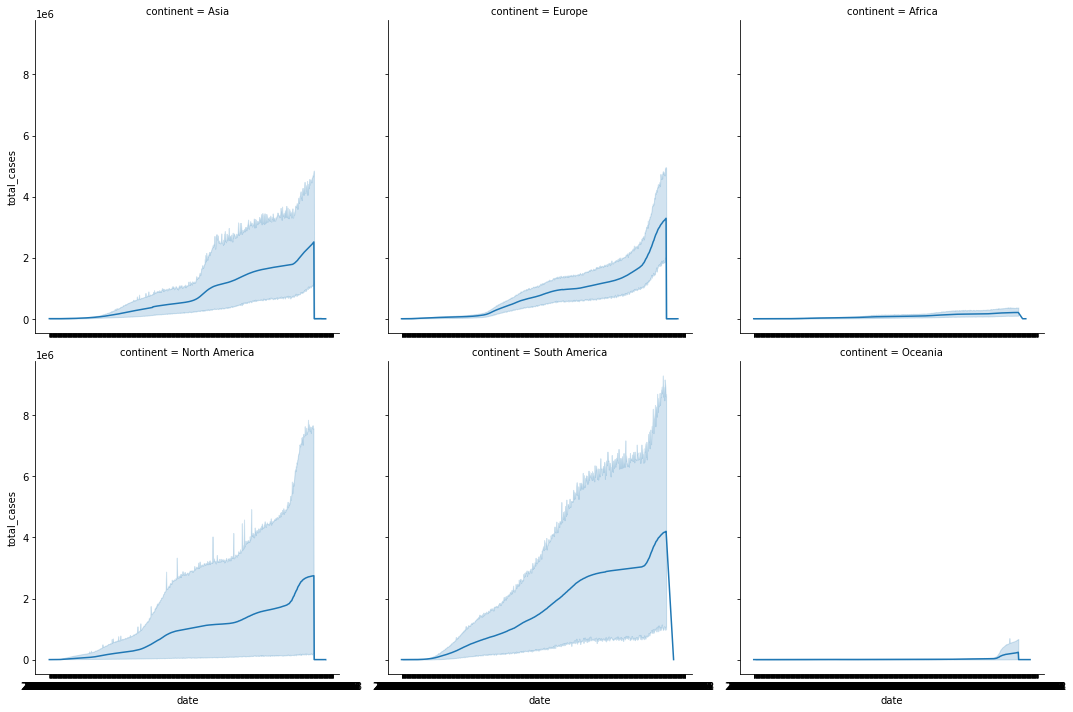

In [11]:
sns.relplot(x='date', y='total_cases', kind='line', col='continent', col_wrap=3, data=covid1)

### Total cases per million by continent

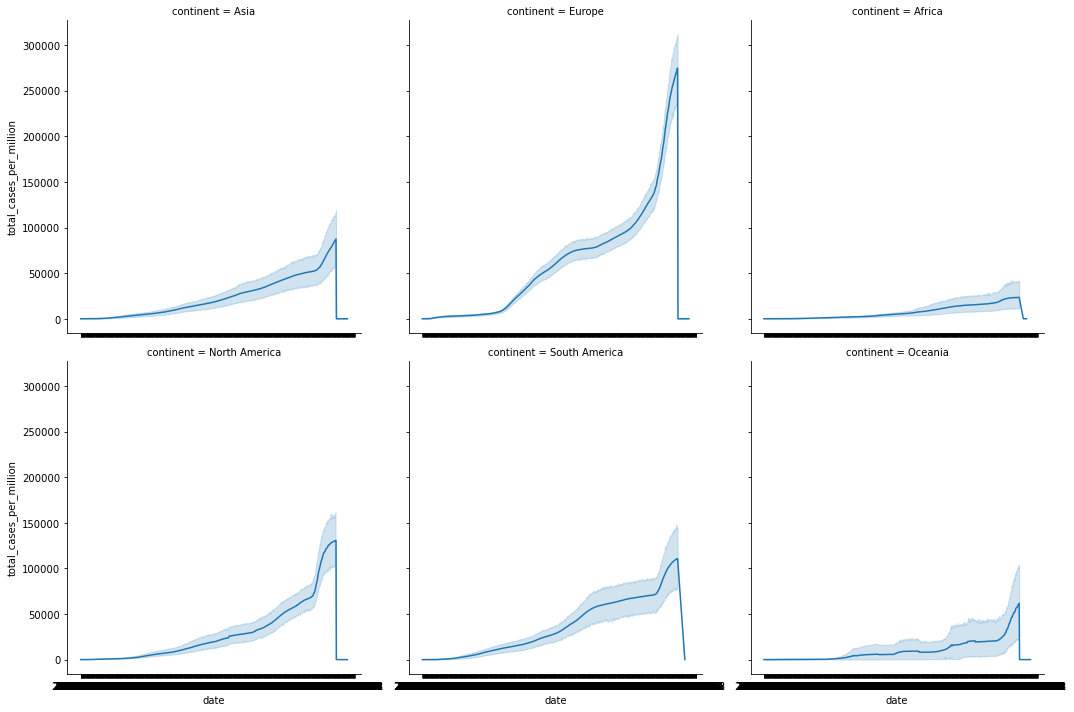

In [12]:
sns.relplot(x='date', y='total_cases_per_million', kind='line', col='continent', col_wrap=3, data=covid1)

### total_vaccinations_per_hundred

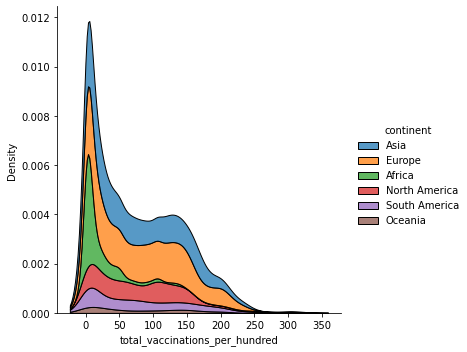

In [13]:
sns.displot(covid1, x="total_vaccinations_per_hundred", hue="continent", kind="kde", multiple="stack")

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

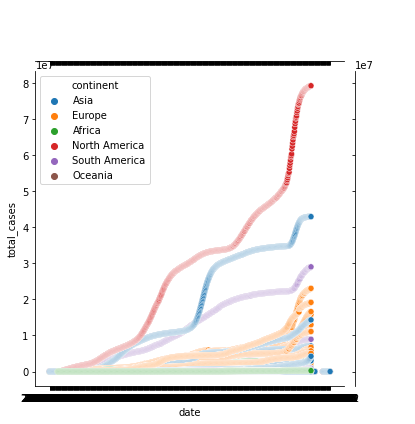

In [56]:
sns.jointplot(data=covid1, x="date", y="total_cases", hue="continent")

<AxesSubplot:xlabel='location', ylabel='total_cases'>

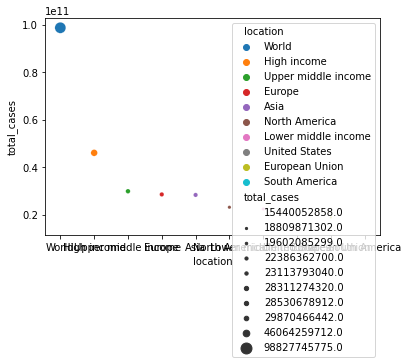

In [65]:
# a. Top 10 confirmed countries (Bubble plot)

top10_cases = pd.DataFrame(covid1.groupby('location')['total_cases'].sum().nlargest(10).sort_values(ascending = False))

#fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                #color = top10_confirmed.index, title = 'Top 10 Confirmed Cases Countries')

sns.scatterplot(
    data=top10_cases, x=top10_cases.index, y="total_cases", hue=top10_cases.index, size="total_cases",
    sizes=(0, 120), legend="full"
)


#fig1.show()

In [68]:
covid1.value_counts('location')

location
Argentina       795
Mexico          795
Thailand        792
Taiwan          780
China           774
               ... 
Turkmenistan    183
Tuvalu          179
Niue            157
Tokelau         114
Pitcairn         85
Length: 238, dtype: int64